In [7]:
!wget 185.48.234.249/swift/v1/AUTH_afccea586afd4ef3bb11fe37dd1ddfbf/Download_KPLabs_Chellenge/train_data.zip --no-check-certificate

In [13]:
!unzip train_data.zip

Archive:  ../train_data.zip.1
   creating: train_data/
  inflating: __MACOSX/._train_data   
  inflating: train_data/train_gt.csv  
  inflating: __MACOSX/train_data/._train_gt.csv  
   creating: train_data/train_data/
  inflating: __MACOSX/train_data/._train_data  
  inflating: train_data/wavelengths.csv  
  inflating: __MACOSX/train_data/._wavelengths.csv  
  inflating: train_data/train_data/77.npz  
  inflating: __MACOSX/train_data/train_data/._77.npz  
  inflating: train_data/train_data/837.npz  
  inflating: __MACOSX/train_data/train_data/._837.npz  
  inflating: train_data/train_data/189.npz  
  inflating: __MACOSX/train_data/train_data/._189.npz  
  inflating: train_data/train_data/1409.npz  
  inflating: __MACOSX/train_data/train_data/._1409.npz  
  inflating: train_data/train_data/63.npz  
  inflating: __MACOSX/train_data/train_data/._63.npz  
  inflating: train_data/train_data/823.npz  
  inflating: __MACOSX/train_data/train_data/._823.npz  
  inflating: train_data/train_data/

In [15]:
!wget 185.48.234.249/swift/v1/AUTH_afccea586afd4ef3bb11fe37dd1ddfbf/Download_KPLabs_Chellenge/test_data.zip --no-check-certificate

--2022-02-22 15:59:06--  http://185.48.234.249/swift/v1/AUTH_afccea586afd4ef3bb11fe37dd1ddfbf/Download_KPLabs_Chellenge/test_data.zip
Connecting to 185.48.234.249:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://185.48.234.249/swift/v1/AUTH_afccea586afd4ef3bb11fe37dd1ddfbf/Download_KPLabs_Chellenge/test_data.zip [following]
--2022-02-22 15:59:06--  https://185.48.234.249/swift/v1/AUTH_afccea586afd4ef3bb11fe37dd1ddfbf/Download_KPLabs_Chellenge/test_data.zip
Connecting to 185.48.234.249:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1314110621 (1.2G) [application/zip]
Saving to: ‘test_data.zip’

test_data.zip       100%[===================>]   1.22G  67.2MB/s    in 16s     

2022-02-22 15:59:22 (76.8 MB/s) - ‘test_data.zip’ saved [1314110621/1314110621]



In [16]:
!unzip test_data.zip

Archive:  test_data.zip
   creating: test_data/
  inflating: test_data/0.npz         
  inflating: test_data/1.npz         
  inflating: test_data/10.npz        
  inflating: test_data/100.npz       
  inflating: test_data/1000.npz      
  inflating: test_data/1001.npz      
  inflating: test_data/1002.npz      
  inflating: test_data/1003.npz      
  inflating: test_data/1004.npz      
  inflating: test_data/1005.npz      
  inflating: test_data/1006.npz      
  inflating: test_data/1007.npz      
  inflating: test_data/1008.npz      
  inflating: test_data/1009.npz      
  inflating: test_data/101.npz       
  inflating: test_data/1010.npz      
  inflating: test_data/1011.npz      
  inflating: test_data/1012.npz      
  inflating: test_data/1013.npz      
  inflating: test_data/1014.npz      
  inflating: test_data/1015.npz      
  inflating: test_data/1016.npz      
  inflating: test_data/1017.npz      
  inflating: test_data/1018.npz      
  inflating: test_data/1019.npz      
  

# Introduction
How to open and understand the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Basic information
1. Hyperspectral data:
    1. `hsi_path` contains path to hyperspectral masked numpy arrays containing hyperspectral data that underwent masking (i.e., the field area is masked, whereas all irrelevant areas are not masked)
    2. The name of the file (e.g., _'1989.npz'_) refers to the index of the corresponding training sample in the ground-truth table.
2. Ground-truth data:
    1. `gt_path` contains path to ground truth .csv file.
    2. Additionally, `wavelength_path` contains the mapping between a band number and the corresponding wavelength.


In [2]:
train_path = r'train_data'

In [5]:
hsi_path = os.path.join(train_path, 'train_data/1580.npz')
gt_path = os.path.join(train_path, 'train_gt.csv')
wavelength_path = os.path.join(train_path, 'wavelengths.csv')

In [4]:
gt_df = pd.read_csv(gt_path)
wavelength_df = pd.read_csv(wavelength_path)

In [5]:
wavelength_df

,band_no,wavelength
0,1,462.08
1,2,465.27
2,3,468.47
3,4,471.67
4,5,474.86
...,...,...
145,146,925.58
146,147,928.78
147,148,931.98
148,149,935.17


## Ground-truth description
`gt_df` contains:

1. `sample_index` - a reference to the numpay array containing the corresponding hyperspectral data.
2. P (for simplicity, we use P while referring to P_2O_5), K, Mg, pH - soil properties levels based on laboratory measurements.

In [15]:
gt_df[gt_df['sample_index']==1580]

,sample_index,P,K,Mg,pH
1580,1580,65.8,173.0,122.0,6.9


## Displaying one hyperspectral band

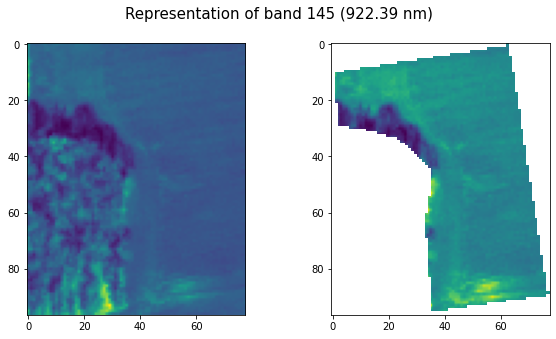

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
band_id = 145
wavelength = wavelength_df.loc[band_id-1]

with np.load(hsi_path) as npz:
    arr = np.ma.MaskedArray(**npz)

axs[0].imshow(arr[band_id,:,:].data)
axs[1].imshow(arr[band_id,:,:])
plt.suptitle(f'Representation of band {int(wavelength["band_no"])} ({wavelength["wavelength"]} nm)', fontsize=15)
plt.show()

In [26]:
arr[100].fill_value

999999

In [21]:
arr[100].data

array([[1108,  913,  972, ...,  825,  806,  788],
       [1392,  987,  971, ...,  827,  819,  820],
       [1168,  969,  977, ...,  849,  815,  843],
       ...,
       [1065,  878,  730, ...,  877,  866,  871],
       [1642,  803, 1077, ...,  835,  871,  912],
       [1529,  852, 1266, ...,  895,  882,  901]], dtype=int16)

## Displaying the aggregated spectral curve for a field

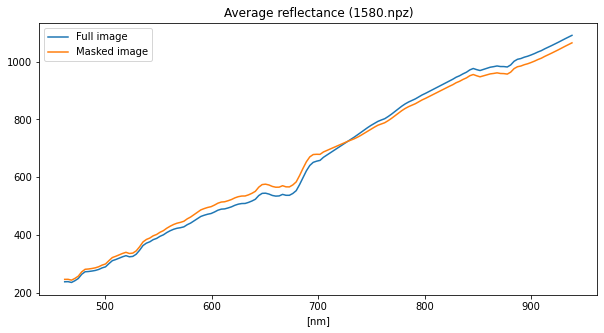

In [27]:
fig = plt.figure(figsize=(10, 5))

masked_scene_mean_spectral_reflectance = [arr[i,:,:].mean() for i in range(arr.shape[0])]
full_scene_mean_spectral_reflectance = [arr[i,:,:].data.mean() for i in range(arr.shape[0])]

plt.plot(wavelength_df['wavelength'], full_scene_mean_spectral_reflectance, label='Full image')
plt.plot(wavelength_df['wavelength'], masked_scene_mean_spectral_reflectance, label='Masked image')

plt.xlabel('[nm]')
plt.legend()
plt.title(f'Average reflectance ({hsi_path.split("/")[-1]})')
plt.show()

# Generating baseline solution

In [4]:
class BaselineRegressor:
    """
    Baseline regressor, which calculates the mean value of the target from the training
    data and returns it for each testing sample.
    """
    def __init__(self):
        self.mean = 0

    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        self.mean = np.mean(y_train, axis=0)
        self.classes_count = y_train.shape[1]
        return self

    def predict(self, X_test: np.ndarray):
        return np.full((len(X_test), self.classes_count), self.mean)


class SpectralCurveFiltering():
    """
    Create a histogram (a spectral curve) of a 3D cube, using the merge_function
    to aggregate all pixels within one band. The return array will have
    the shape of [CHANNELS_COUNT]
    """

    def __init__(self, merge_function = np.mean):
        self.merge_function = merge_function

    def __call__(self, sample: np.ndarray):
        return self.merge_function(sample, axis=(1, 2))


## Load the data

In [32]:
arr.shape

(150, 97, 78)

In [31]:
np.mean(arr, axis=(1,2)).shape

(150,)

In [8]:
import os
from glob import glob

def load_data(directory: str):
    """Load each cube, reduce its dimensionality and append to array.

    Args:
        directory (str): Directory to either train or test set
    Returns:
        [type]: A list with spectral curve for each sample.
    """
    data = []
    filtering = SpectralCurveFiltering()
    all_files = np.array(
        sorted(
            glob(os.path.join(directory, "*.npz")),
            key=lambda x: int(os.path.basename(x).replace(".npz", "")),
        )
    )
    for file_name in all_files:
        with np.load(file_name) as npz:
            arr = np.ma.MaskedArray(**npz)
        arr = filtering(arr)
        data.append(arr)
    return np.array(data)


def load_gt(file_path: str):
    """Load labels for train set from the ground truth file.
    Args:
        file_path (str): Path to the ground truth .csv file.
    Returns:
        [type]: 2D numpy array with soil properties levels
    """
    gt_file = pd.read_csv(file_path)
    labels = gt_file[["P", "K", "Mg", "pH"]].values
    return labels


X_train = load_data(os.path.join(train_path, "train_data"))
y_train = load_gt(os.path.join(train_path, "train_gt.csv"))
X_test = load_data("test_data")

print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


KeyboardInterrupt: 

## Make predictions and generate submission file

In [37]:
y_train.shape

(1732, 4)

In [38]:
baseline_reg = BaselineRegressor()
baseline_reg = baseline_reg.fit(X_train, y_train)
predictions = baseline_reg.predict(X_test)

submission = pd.DataFrame(data = predictions, columns=["P", "K", "Mg", "pH"])
submission.to_csv("submission.csv", index_label="sample_index")


In [40]:
predictions

array([[ 70.30265589, 227.98851039, 159.28123557,   6.7827194 ],
       [ 70.30265589, 227.98851039, 159.28123557,   6.7827194 ],
       [ 70.30265589, 227.98851039, 159.28123557,   6.7827194 ],
       ...,
       [ 70.30265589, 227.98851039, 159.28123557,   6.7827194 ],
       [ 70.30265589, 227.98851039, 159.28123557,   6.7827194 ],
       [ 70.30265589, 227.98851039, 159.28123557,   6.7827194 ]])

In [41]:
baseline_reg.mean

array([ 70.30265589, 227.98851039, 159.28123557,   6.7827194 ])

In [42]:
submission

,P,K,Mg,pH
0,70.302656,227.98851,159.281236,6.782719
1,70.302656,227.98851,159.281236,6.782719
2,70.302656,227.98851,159.281236,6.782719
3,70.302656,227.98851,159.281236,6.782719
4,70.302656,227.98851,159.281236,6.782719
...,...,...,...,...
1149,70.302656,227.98851,159.281236,6.782719
1150,70.302656,227.98851,159.281236,6.782719
1151,70.302656,227.98851,159.281236,6.782719
1152,70.302656,227.98851,159.281236,6.782719


## Calculating the metric

For the purpose of presenting the final metric calculation, we will extract a small _test_set_ from the training set.

In [46]:
X_test = X_train[1500:]
y_test = y_train[1500:]

X_train_new = X_train[:1500]
y_train_new = y_train[:1500]

# Fit the baseline regressor once again on new training set
baseline_reg = baseline_reg.fit(X_train_new, y_train_new)
baseline_predictions = baseline_reg.predict(X_test)

# Generate baseline values to be used in score computation
baselines = np.mean((y_test - baseline_predictions) ** 2, axis=0)


# Generate random predictions, different from baseline predictions
np.random.seed(0)
predictions = np.zeros_like(y_test)
for column_index in range(predictions.shape[1]):
    class_mean_value = baseline_reg.mean[column_index]
    predictions[:, column_index] = np.random.uniform(low=class_mean_value - class_mean_value * 0.05,
                                                     high=class_mean_value + class_mean_value * 0.05,
                                                     size=len(predictions))

# Calculate MSE for each class
mse = np.mean((y_test - predictions) ** 2, axis=0)

# Calculate the score for each class individually
scores = mse / baselines

# Calculate the final score
final_score = np.mean(scores)

for score, class_name in zip(scores, ["P", "K", "Mg", "pH"]):
    print(f"Class {class_name} score: {score}")

print(f"Final score: {final_score}")

Class P score: 0.9896068600445717
Class K score: 1.004900913045855
Class Mg score: 1.0228518828521695
Class pH score: 1.6431314552511207
Final score: 1.1651227777984292


In [51]:
baseline_reg.mean

array([ 70.79933333, 234.18273333, 160.7572    ,   6.79858   ])

In [49]:
baselines

array([5.49588849e+02, 3.75637553e+03, 6.44225516e+02, 5.66444647e-02])

In [47]:
mse

array([5.43876895e+02, 3.77478520e+03, 6.58947282e+02, 9.30743017e-02])

In [48]:
scores

array([0.98960686, 1.00490091, 1.02285188, 1.64313146])

In [52]:
final_score

1.1651227777984292

### Calculate mean and std values for all bands in train dataset

I will use modified function prepared before

In [9]:
def calculate_statistics_over_data(directory: str):
    """Load each cube, reduce its dimensionality and append to array.

    Args:
        directory (str): Directory to either train or test set
    Returns:
        [type]: A list with spectral curve for each sample.
    """
    data_means = []
    data_stds = []
    max_x_shape = 0
    max_y_shape = 0
    filtering_mean = SpectralCurveFiltering(np.mean)
    filtering_std = SpectralCurveFiltering(np.std)

    all_files = np.array(
        sorted(
            glob(os.path.join(directory, "*.npz")),
            key=lambda x: int(os.path.basename(x).replace(".npz", "")),
        )
    )
    
    for file_name in all_files:
        with np.load(file_name) as npz:
            arr = np.ma.MaskedArray(**npz)
        arr_means = filtering_mean(arr) # filtering on MaskedArray
        arr_stds = filtering_std(arr)
        data_means.append(arr_means)
        data_stds.append(arr_stds)
        # find max value of shape x and y
        if arr.shape[1] > max_x_shape:
            max_x_shape = arr.shape[1]
        if arr.shape[2] > max_y_shape:
            max_y_shape = arr.shape[2]
    return (np.array(data_means), np.array(data_stds), max_x_shape, max_y_shape)

In [10]:
means, stds, max_x_shape, max_y_shape = calculate_statistics_over_data(os.path.join(train_path, "train_data"))

In [14]:
means.shape, stds.shape

((1732, 150), (1732, 150))

In [62]:
max_x_shape, max_y_shape

(268, 284)

In [69]:
np.mean(means, axis=0)

array([ 380.69796802,  380.21821851,  375.3940629 ,  382.71272947,
        391.81669256,  410.10678125,  420.41193138,  421.08248316,
        423.20969611,  425.81389112,  430.95761155,  439.05738586,
        445.26178594,  461.91868367,  477.43015924,  485.56633886,
        495.79435244,  506.11479424,  516.21051538,  516.61082525,
        524.84494072,  540.76026153,  564.61822547,  591.09354295,
        605.75960043,  614.83378331,  627.6840351 ,  635.5344616 ,
        647.94085424,  656.72806681,  668.8680145 ,  677.99659314,
        684.74873347,  688.01498046,  688.04223336,  688.97582589,
        696.23302946,  701.02919897,  709.25500755,  718.55036443,
        728.37434222,  733.84572864,  738.39068489,  741.44088322,
        748.6318281 ,  756.17877348,  760.00557153,  759.43438242,
        762.72246294,  767.03586947,  773.64687428,  778.32746172,
        780.86499286,  780.77923217,  785.33772712,  790.63138794,
        796.5748069 ,  811.86655394,  819.21326698,  815.95279

In [70]:
np.mean(stds, axis=0)

array([ 37.76234326,  37.8531961 ,  37.73343421,  38.32931344,
        39.13257785,  40.42938852,  41.34076742,  41.72389351,
        42.27534105,  42.86795671,  43.63198896,  44.57456473,
        45.34262766,  46.7415058 ,  48.06766522,  48.83157408,
        49.64993318,  50.33354345,  50.89544173,  50.76215966,
        51.17931132,  52.2040758 ,  53.8719068 ,  55.85681014,
        57.17300019,  58.13478738,  59.44544535,  60.46881653,
        61.87049916,  63.0443788 ,  64.52595553,  65.90322768,
        67.22639642,  68.34917595,  69.2464825 ,  70.20236882,
        71.63993386,  72.83811437,  74.23150649,  75.61712075,
        76.93731222,  77.81046831,  78.52380864,  79.0436265 ,
        79.92441433,  80.83456377,  81.47067566,  81.77100857,
        82.43880487,  83.17831686,  84.01460999,  84.53787137,
        84.74903993,  84.69195775,  85.12139428,  85.75141489,
        86.63352621,  88.6145488 ,  89.90467469,  90.19451008,
        90.03625536,  89.74667988,  89.97415275,  90.76

In [83]:
np.savez(os.path.join(train_path, 'means_stds_values_training_data.npz'), means=np.mean(means, axis=0), stds=np.mean(stds, axis=0))

In [6]:
loaded_arrays = np.load(os.path.join(train_path, 'means_stds_values_training_data.npz'))
loaded_arrays.files

['means', 'stds']

In [9]:
means = np.array(loaded_arrays['means'])
means

array([ 380.69796802,  380.21821851,  375.3940629 ,  382.71272947,
        391.81669256,  410.10678125,  420.41193138,  421.08248316,
        423.20969611,  425.81389112,  430.95761155,  439.05738586,
        445.26178594,  461.91868367,  477.43015924,  485.56633886,
        495.79435244,  506.11479424,  516.21051538,  516.61082525,
        524.84494072,  540.76026153,  564.61822547,  591.09354295,
        605.75960043,  614.83378331,  627.6840351 ,  635.5344616 ,
        647.94085424,  656.72806681,  668.8680145 ,  677.99659314,
        684.74873347,  688.01498046,  688.04223336,  688.97582589,
        696.23302946,  701.02919897,  709.25500755,  718.55036443,
        728.37434222,  733.84572864,  738.39068489,  741.44088322,
        748.6318281 ,  756.17877348,  760.00557153,  759.43438242,
        762.72246294,  767.03586947,  773.64687428,  778.32746172,
        780.86499286,  780.77923217,  785.33772712,  790.63138794,
        796.5748069 ,  811.86655394,  819.21326698,  815.95279

In [10]:
stds = np.array(loaded_arrays['stds'])
stds

array([ 37.76234326,  37.8531961 ,  37.73343421,  38.32931344,
        39.13257785,  40.42938852,  41.34076742,  41.72389351,
        42.27534105,  42.86795671,  43.63198896,  44.57456473,
        45.34262766,  46.7415058 ,  48.06766522,  48.83157408,
        49.64993318,  50.33354345,  50.89544173,  50.76215966,
        51.17931132,  52.2040758 ,  53.8719068 ,  55.85681014,
        57.17300019,  58.13478738,  59.44544535,  60.46881653,
        61.87049916,  63.0443788 ,  64.52595553,  65.90322768,
        67.22639642,  68.34917595,  69.2464825 ,  70.20236882,
        71.63993386,  72.83811437,  74.23150649,  75.61712075,
        76.93731222,  77.81046831,  78.52380864,  79.0436265 ,
        79.92441433,  80.83456377,  81.47067566,  81.77100857,
        82.43880487,  83.17831686,  84.01460999,  84.53787137,
        84.74903993,  84.69195775,  85.12139428,  85.75141489,
        86.63352621,  88.6145488 ,  89.90467469,  90.19451008,
        90.03625536,  89.74667988,  89.97415275,  90.76

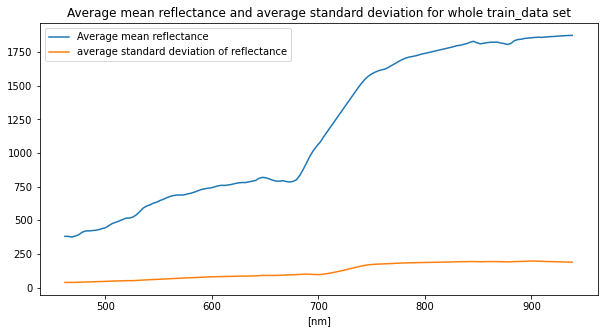

In [14]:
fig = plt.figure(figsize=(10, 5))

plt.plot(wavelength_df['wavelength'], means, label='Average mean reflectance')
plt.plot(wavelength_df['wavelength'], stds, label='average standard deviation of reflectance')

plt.xlabel('[nm]')
plt.legend()
plt.title(f'Average mean reflectance and average standard deviation for whole train_data set')
plt.show()

No handles with labels found to put in legend.


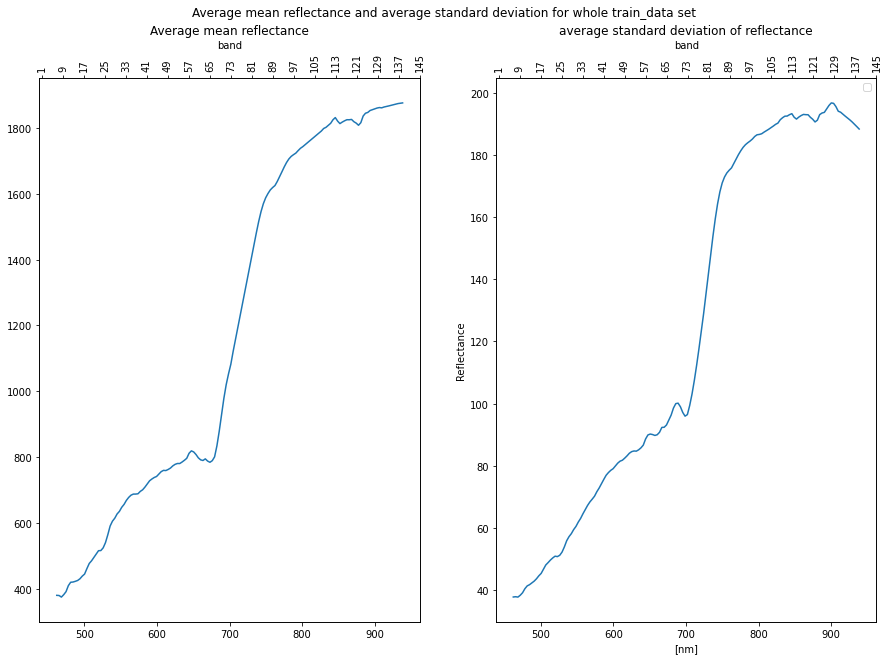

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].plot(wavelength_df['wavelength'], means)
axs[0].set_title('Average mean reflectance')
plt.xlabel('[nm]')
plt.ylabel('Reflectance')
axs[1].plot(wavelength_df['wavelength'], stds)
axs[1].set_title('average standard deviation of reflectance')
plt.ylabel('Reflectance')

plt.xlabel('[nm]')

axes2 = axs[0].twiny()
axes2.set_xticks(list(range(1, 151, 8)))

plt.xticks(rotation=90)
plt.xlabel('band')

axes3 = axs[1].twiny()
axes3.set_xticks(list(range(1, 151, 8)))
plt.xlabel('band')

plt.xticks(rotation=90)

plt.legend()
fig.suptitle(f'Average mean reflectance and average standard deviation for whole train_data set')
plt.show()

### export Numpy data to TIFFs

In [8]:
from glob import glob
import rasterio
import rasterio.crs

In [9]:
train_data_directory = r'train_data'
test_data_directory = r'test_data'
output_dir = r'output_tiffs'

In [10]:
all_files = np.array(
    sorted(
        glob(os.path.join(train_data_directory, 'train_data', "*.npz")),
        key=lambda x: int(os.path.basename(x).replace(".npz", "")),
    )
)

In [25]:
for i in range(all_files.shape[0]):
    crs = rasterio.crs.CRS({'init': "epsg:2180"})
    transform = rasterio.transform.Affine(2.0, 0.0, 0.0, 0.0, -2.0, 0.0)
    
    array = np.ma.MaskedArray(**np.load(all_files[i])).data
    
    dst = rasterio.open(os.path.join(output_dir, f"patch_{i}.tif"), 'w', driver='GTiff',
                            height = array.shape[1], width = array.shape[2],
                            count=array.shape[0], dtype=str(array.dtype), transform=transform,
                            crs=crs)
    dst.write(array)
    dst.close()

In [26]:
!zip -r tiffs_train.zip output_tiffs

  adding: output_tiffs/ (stored 0%)
  adding: output_tiffs/patch_1531.tif (deflated 38%)
  adding: output_tiffs/patch_289.tif (deflated 35%)
  adding: output_tiffs/patch_260.tif (deflated 35%)
  adding: output_tiffs/patch_702.tif (deflated 45%)
  adding: output_tiffs/patch_1081.tif (deflated 43%)
  adding: output_tiffs/patch_662.tif (deflated 41%)
  adding: output_tiffs/patch_839.tif (deflated 38%)
  adding: output_tiffs/patch_1714.tif (deflated 40%)
  adding: output_tiffs/patch_418.tif (deflated 29%)
  adding: output_tiffs/patch_161.tif (deflated 28%)
  adding: output_tiffs/patch_1156.tif (deflated 31%)
  adding: output_tiffs/patch_1148.tif (deflated 36%)
  adding: output_tiffs/patch_106.tif (deflated 37%)
  adding: output_tiffs/patch_1534.tif (deflated 38%)
  adding: output_tiffs/patch_542.tif (deflated 28%)
  adding: output_tiffs/patch_684.tif (deflated 43%)
  adding: output_tiffs/patch_467.tif (deflated 30%)
  adding: output_tiffs/patch_1061.tif (deflated 45%)
  adding: output_tiff

### Standardize values of predicted parameters and dump them to pickle file

In [28]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

In [8]:
parameters = ['P', 'K', 'Mg', 'pH']

In [27]:
gt_df = pd.read_csv(gt_path)
gt_df

,sample_index,P,K,Mg,pH
0,0,45.1,188.0,179.0,7.2
1,1,44.8,205.0,188.0,7.0
2,2,44.4,207.0,145.0,6.8
3,3,46.5,204.0,143.0,6.8
4,4,52.0,212.0,167.0,6.7
...,...,...,...,...,...
1727,1727,40.8,133.0,132.0,6.2
1728,1728,42.7,192.0,126.0,6.5
1729,1729,39.4,180.0,122.0,6.5
1730,1730,37.3,162.0,127.0,6.5


#### Test scaling

In [44]:
scaler = StandardScaler()

In [31]:
scaler.fit(gt_df.loc[:, 'P'].values)

ValueError: Expected 2D array, got 1D array instead:
array=[45.1 44.8 44.4 ... 39.4 37.3 29.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [45]:
data_P = gt_df.loc[:, 'P'].values.reshape(-1, 1)
data_P

array([[45.1],
       [44.8],
       [44.4],
       ...,
       [39.4],
       [37.3],
       [29.5]])

In [46]:
scaler.fit(data_P)

StandardScaler()

In [47]:
scaler.scale_

array([29.49626555])

In [48]:
scaler.mean_

array([70.30265589])

In [49]:
scaler.var_

array([870.02968117])

In [50]:
data_P_scaled = scaler.transform(data_P)
data_P_scaled

array([[-0.85443548],
       [-0.86460626],
       [-0.8781673 ],
       ...,
       [-1.04768028],
       [-1.11887574],
       [-1.38331599]])

In [51]:
data_P_scaled.mean()

-5.743417032702889e-17

In [52]:
data_P_scaled.std()

1.0

#### Loop over all parameters and save scaler

In [30]:
for param in parameters:
    scaler = StandardScaler()
    data = gt_df.loc[:, param].values.reshape(-1, 1)
    
    scaler.fit(data)
    print(f'Parameter {param} mean: {scaler.mean_}, scale: {scaler.scale_}, var: {scaler.var_}')
    dump(scaler, open(f'train_data/standard_scaler_{param}.pkl', 'wb'))

Parameter P mean: [70.30265589], scale: [29.49626555], var: [870.02968117]
Parameter K mean: [227.98851039], scale: [61.87411968], var: [3828.4066867]
Parameter Mg mean: [159.28123557], scale: [39.86031717], var: [1588.84488462]
Parameter pH mean: [6.7827194], scale: [0.26022296], var: [0.06771599]


In [53]:
scaler.transform(np.array(gt_df.loc[0, 'P']).reshape(1, -1))[0][0]

-0.8544354826792656